<a href="https://colab.research.google.com/github/Oviing/survival_analysis/blob/main/survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
set.seed(123)

In [222]:
install.packages('BBmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
install.packages("mlr3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘future’, ‘globals’, ‘PRROC’, ‘checkmate’, ‘future.apply’, ‘lgr’, ‘mlbench’, ‘mlr3measures’, ‘mlr3misc’, ‘parallelly’, ‘palmerpenguins’, ‘paradox’




In [2]:
install.packages("mlr3verse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R62S3’, ‘set6’, ‘clue’, ‘clusterCrit’, ‘distr6’, ‘bbotk’, ‘mlr3cluster’, ‘mlr3data’, ‘mlr3filters’, ‘mlr3fselect’, ‘mlr3learners’, ‘mlr3pipelines’, ‘mlr3proba’, ‘mlr3tuning’, ‘mlr3viz’




In [3]:
remotes::install_github("mlr-org/mlr3extralearners")


✔  checking for file ‘/tmp/Rtmpz8I6fU/remotes3b7ea7fc00/mlr-org-mlr3extralearners-38759e6/DESCRIPTION’
─  preparing ‘mlr3extralearners’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
─  saving partial Rd database (20.7s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘mlr3extralearners/vignettes’
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘mlr3extralearners_0.4.7.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("tensorflow")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘config’, ‘reticulate’, ‘tfruns’




In [79]:
install.packages("magrittr ")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘magrittr ’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [5]:
library(tensorflow)
install_tensorflow()

ERROR: ignored

In [87]:
library(survivalmodels)
library(mlr3)
library(mlr3proba)  
library(survival)
library(mlr3misc)
library(survival)
library(mlr3tuning)
library(mlr3benchmark)
library(mlr3extralearners)
library(paradox)
library(mlr3learners)
library(dplyr)
library(magrittr)

#test/train split

head(gbcs)
dim(gbcs)
str(gbcs)
table(gbcs$censdead)

gbcs$grade <- as.factor(gbcs$grade)


try1 <- coxph(Surv(survtime, censdead) ~ grade, data = gbcs) 
summary(try1) 

gbcs2 <- gbcs[,c(5:12,15:16)]
head(gbcs2)
str(gbcs2)

gbcs2$age <- scale(gbcs2$age)
gbcs2$menopause <- gbcs2$menopause-1
gbcs2$hormone <- gbcs2$hormone-1
gbcs2$size <- scale(gbcs2$size)
gbcs2$grade <- as.factor(gbcs2$grade)
grade123 <- with(gbcs2, data.frame(model.matrix(~grade-1))) # 3 dummies for the grade
gbcs2$nodes <- scale(gbcs2$nodes)
gbcs2$prog_recp <- scale(gbcs2$prog_recp)
gbcs2$estrg_recp <- scale(gbcs2$estrg_recp)


head(gbcs2)

cov <- data.frame(gbcs2[,c(1:4, 6:10)], grade1 = grade123[,1], 
                  grade2 = grade123[,2], grade3 = grade123[,3])
head(cov)

# train/test split 
set.seed(123)
train_set = sample(nrow(cov), 0.8 * nrow(cov))
str(train_set)
test_set = setdiff(seq_len(nrow(cov)), train_set)

train_gbcs <- cov[train_set, ]
dim(train_gbcs)
head(train_gbcs)
table(train_gbcs$censdead)

test_gbcs <- cov[test_set, ]
dim(test_gbcs)
head(test_gbcs)
table(test_gbcs$censdead)

,id,diagdate,recdate,deathdate,age,menopause,hormone,size,grade,nodes,prog_recp,estrg_recp,rectime,censrec,survtime,censdead
,<int>,<date>,<date>,<date>,<dbl>,<int>,<int>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,1,1984-08-17,1988-04-15,1990-11-16,38,1,1,18,3,5,141,105,1337,1,2282,0
2,2,1985-04-25,1989-03-15,1990-10-22,52,1,1,20,1,1,78,14,1420,1,2006,0
3,3,1984-10-11,1988-04-12,1988-10-06,47,1,1,30,2,1,422,89,1279,1,1456,1
4,4,1984-06-29,1984-11-24,1984-11-24,40,1,1,24,1,3,25,11,148,0,148,0
5,5,1984-07-03,1989-08-09,1989-08-09,64,2,2,19,2,1,19,9,1863,0,1863,0
6,6,1984-07-24,1989-11-08,1989-11-08,49,2,2,56,1,3,356,64,1933,0,1933,0


[1] 686  16

'data.frame':	686 obs. of  16 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ diagdate  : Date, format: "1984-08-17" "1985-04-25" ...
 $ recdate   : Date, format: "1988-04-15" "1989-03-15" ...
 $ deathdate : Date, format: "1990-11-16" "1990-10-22" ...
 $ age       : num  38 52 47 40 64 49 53 61 43 74 ...
 $ menopause : int  1 1 1 1 2 2 2 2 1 2 ...
 $ hormone   : int  1 1 1 1 2 2 1 2 1 2 ...
 $ size      : num  18 20 30 24 19 56 52 22 30 20 ...
 $ grade     : Factor w/ 3 levels "1","2","3": 3 1 2 1 2 1 2 2 2 2 ...
 $ nodes     : int  5 1 1 3 1 3 9 2 1 1 ...
 $ prog_recp : num  141 78 422 25 19 356 6 6 22 462 ...
 $ estrg_recp: num  105 14 89 11 9 64 29 173 0 240 ...
 $ rectime   : num  1337 1420 1279 148 1863 ...
 $ censrec   : int  1 1 1 0 0 0 1 1 0 0 ...
 $ survtime  : num  2282 2006 1456 148 1863 ...
 $ censdead  : int  0 0 1 0 0 0 1 0 0 0 ...



  0   1 
515 171 

Call:
coxph(formula = Surv(survtime, censdead) ~ grade, data = gbcs)

  n= 686, number of events= 171 

         coef exp(coef) se(coef)     z Pr(>|z|)    
grade2 1.2426    3.4647   0.4196 2.962  0.00306 ** 
grade3 1.8622    6.4381   0.4292 4.339 1.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
grade2     3.465     0.2886     1.522     7.885
grade3     6.438     0.1553     2.776    14.930

Concordance= 0.613  (se = 0.019 )
Likelihood ratio test= 31.96  on 2 df,   p=1e-07
Wald test            = 26.67  on 2 df,   p=2e-06
Score (logrank) test = 30.15  on 2 df,   p=3e-07


,age,menopause,hormone,size,grade,nodes,prog_recp,estrg_recp,survtime,censdead
,<dbl>,<int>,<int>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,38,1,1,18,3,5,141,105,2282,0
2,52,1,1,20,1,1,78,14,2006,0
3,47,1,1,30,2,1,422,89,1456,1
4,40,1,1,24,1,3,25,11,148,0
5,64,2,2,19,2,1,19,9,1863,0
6,49,2,2,56,1,3,356,64,1933,0


'data.frame':	686 obs. of  10 variables:
 $ age       : num  38 52 47 40 64 49 53 61 43 74 ...
 $ menopause : int  1 1 1 1 2 2 2 2 1 2 ...
 $ hormone   : int  1 1 1 1 2 2 1 2 1 2 ...
 $ size      : num  18 20 30 24 19 56 52 22 30 20 ...
 $ grade     : Factor w/ 3 levels "1","2","3": 3 1 2 1 2 1 2 2 2 2 ...
 $ nodes     : int  5 1 1 3 1 3 9 2 1 1 ...
 $ prog_recp : num  141 78 422 25 19 356 6 6 22 462 ...
 $ estrg_recp: num  105 14 89 11 9 64 29 173 0 240 ...
 $ survtime  : num  2282 2006 1456 148 1863 ...
 $ censdead  : int  0 0 1 0 0 0 1 0 0 0 ...


,age,menopause,hormone,size,grade,nodes,prog_recp,estrg_recp,survtime,censdead
,"<dbl[,1]>",<dbl>,<dbl>,"<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<int>
1,-1.4872904,0,0,-0.79247861,3,-0.001863595,0.1532355,0.05714389,2282,0
2,-0.1039922,0,0,-0.65258146,1,-0.732392712,-0.1581346,-0.53730113,2006,0
3,-0.5980273,0,0,0.04690429,2,-0.732392712,1.5420451,-0.04737391,1456,1
4,-1.2896764,0,0,-0.37278716,1,-0.367128153,-0.4200809,-0.55689822,148,0
5,1.0816919,1,1,-0.72253003,2,-0.732392712,-0.4497352,-0.56996295,1863,0
6,-0.4004133,1,1,1.86556724,1,-0.367128153,1.2158478,-0.21068299,1933,0


,age,menopause,hormone,size,nodes,prog_recp,estrg_recp,survtime,censdead,grade1,grade2,grade3
,"<dbl[,1]>",<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,-1.4872904,0,0,-0.79247861,-0.001863595,0.1532355,0.05714389,2282,0,0,0,1
2,-0.1039922,0,0,-0.65258146,-0.732392712,-0.1581346,-0.53730113,2006,0,1,0,0
3,-0.5980273,0,0,0.04690429,-0.732392712,1.5420451,-0.04737391,1456,1,0,1,0
4,-1.2896764,0,0,-0.37278716,-0.367128153,-0.4200809,-0.55689822,148,0,1,0,0
5,1.0816919,1,1,-0.72253003,-0.732392712,-0.4497352,-0.56996295,1863,0,0,1,0
6,-0.4004133,1,1,1.86556724,-0.367128153,1.2158478,-0.21068299,1933,0,1,0,0


 int [1:548] 415 463 179 526 195 118 299 229 244 14 ...


[1] 548  12

,age,menopause,hormone,size,nodes,prog_recp,estrg_recp,survtime,censdead,grade1,grade2,grade3
,"<dbl[,1]>",<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<int>,<dbl>,<dbl>,<dbl>
415,-1.092062357,0,0,0.7463900,0.9112978,0.09886927,-0.2956037,1278,0,0,1,0
463,1.378112982,1,1,-0.1629414,-0.1844959,4.98194356,4.2901150,1222,0,0,1,0
179,0.785270901,1,0,1.4458758,-0.1844959,-0.49421667,-0.5634306,2456,0,0,1,0
526,-0.894448330,0,0,-0.4427357,-0.5497604,0.93413198,-0.4001215,1638,0,0,1,0
195,-0.993255343,0,0,-0.7924786,-0.7323927,-0.49421667,-0.3609273,71,0,0,1,0
118,-0.005185208,0,0,-0.6525815,-0.5497604,-0.10376843,-0.3935891,909,1,0,1,0



  0   1 
416 132 

[1] 138  12

,age,menopause,hormone,size,nodes,prog_recp,estrg_recp,survtime,censdead,grade1,grade2,grade3
,"<dbl[,1]>",<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,-1.4872904,0,0,-0.79247861,-0.001863595,0.153235483,0.05714389,2282,0,0,0,1
3,-0.5980273,0,0,0.04690429,-0.732392712,1.542045075,-0.04737391,1456,1,0,1,0
9,-0.9932553,0,0,0.04690429,-0.732392712,-0.434908080,-0.62875421,2563,0,0,1,0
18,0.2912358,1,1,0.74639004,-0.367128153,-0.543640504,-0.60915712,2450,1,0,1,0
22,0.2912358,0,1,-0.58263288,-0.367128153,0.004963997,-0.49810695,1722,0,0,1,0
27,0.7852709,1,0,-0.65258146,-0.001863595,-0.420080932,-0.13882699,1889,1,0,1,0



 0  1 
99 39 

In [88]:
task_gbcs = TaskSurv$new(id = "train_gbcs", backend = train_gbcs, time = "survtime", event = "censdead")
test_gbcs = TaskSurv$new(id = "test_gbcs", backend = test_gbcs, time = "survtime", event = "censdead")

NDml <- data.frame(age = 0, menopause = 1, hormone = 1,
                   size = 0, grade1 = c(1,0,0), grade2=c(0,1,0), grade3=c(0,0,1), 
                   nodes = 0, prog_recp=0, estrg_recp=0, survtime=1, censdead=1)
ND_gbcs = TaskSurv$new(id = "NDml", backend = NDml, time = "survtime", event = "censdead")


task_gbcs$nrow 
task_gbcs$feature_types

test_gbcs$nrow

[1] 548

id,type
<chr>,<chr>
age,numeric
estrg_recp,numeric
grade1,numeric
grade2,numeric
grade3,numeric
hormone,numeric
menopause,numeric
nodes,numeric
prog_recp,numeric


[1] 138

In [236]:
t <- dplyr::pull(train_gbcs, survtime)
qt <- unname(quantile(t, seq(0.2,1,0.2)))

In [91]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [139]:
train_gbcs_main <- data.frame(train_gbcs["censdead"],train_gbcs["survtime"])
df <- train_gbcs_main %>% filter(censdead == 1)
df <- dplyr::pull(df, survtime)
qt <- unname(quantile(df,seq(0.2,1,0.2)))

In [237]:
learner <- lrn("surv.dnnsurv", verbose = 2, validation_split = 0.2, early_stopping = FALSE, epochs = 10, cutpoints = qt)


learner$train(task_gbcs)
learner$model

learner$param_set

prediction.dnnsurv = learner$predict(test_gbcs) 
prediction.dnnsurv
prediction.dnnsurv$score()


 DNNSurv Neural Network 

Call:
  survivalmodels::dnnsurv(data = as.data.frame(task$data()), time_variable = task$target_names[1L],      status_variable = task$target_names[2L], cutpoints = c(724.6,      1152, 1545.2, 1873.8, 2668), early_stopping = FALSE, verbose = 2L,      epochs = 10L, validation_split = 0.2)

Response:
  Surv(time, status)
Features:
  {age, estrg_recp, grade1, grade2, grade3, hormone, menopause, nodes, prog_recp, size} 

<ParamSet>
                      id    class lower upper nlevels        default
 1:             baseline ParamDbl  -Inf   Inf     Inf <NoDefault[3]>
 2:           batch_size ParamInt     1   Inf     Inf             32
 3:               beta_1 ParamDbl     0     1     Inf            0.9
 4:               beta_2 ParamDbl     0     1     Inf          0.999
 5:            callbacks ParamUty    NA    NA     Inf <NoDefault[3]>
 6:             clipnorm ParamDbl  -Inf   Inf     Inf <NoDefault[3]>
 7:            clipvalue ParamDbl  -Inf   Inf     Inf <NoDefault[3]>
 8:         custom_model ParamUty    NA    NA     Inf <NoDefault[3]>
 9:            cutpoints ParamUty    NA    NA     Inf <NoDefault[3]>
10:                 cuts ParamInt     1   Inf     Inf              5
11:                decay ParamDbl     0   Inf     Inf              0
12:       early_stopping ParamLgl    NA    NA       2          FALSE
13:               epochs ParamInt     1   Inf     Inf             10
14:              epsilo

<PredictionSurv> for 138 observations:
    row_ids time status     crank                     distr
          1 2282  FALSE -2173.094 <VectorDistribution[138]>
          2 1456   TRUE -2388.824 <VectorDistribution[138]>
          3 2563  FALSE -2214.568 <VectorDistribution[138]>
---                                                        
        136  841  FALSE -1901.169 <VectorDistribution[138]>
        137   16  FALSE -1552.732 <VectorDistribution[138]>
        138  857  FALSE -2019.060 <VectorDistribution[138]>

surv.harrell_c 
     0.7007608

In [238]:
# retrieving mean of dnn
a <- prediction.dnnsurv$distr$mean()

In [239]:
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}

In [241]:
#normalize data and putting in decreasing order
n <- normalize(a)
a_b <- sort(n, decreasing = TRUE)

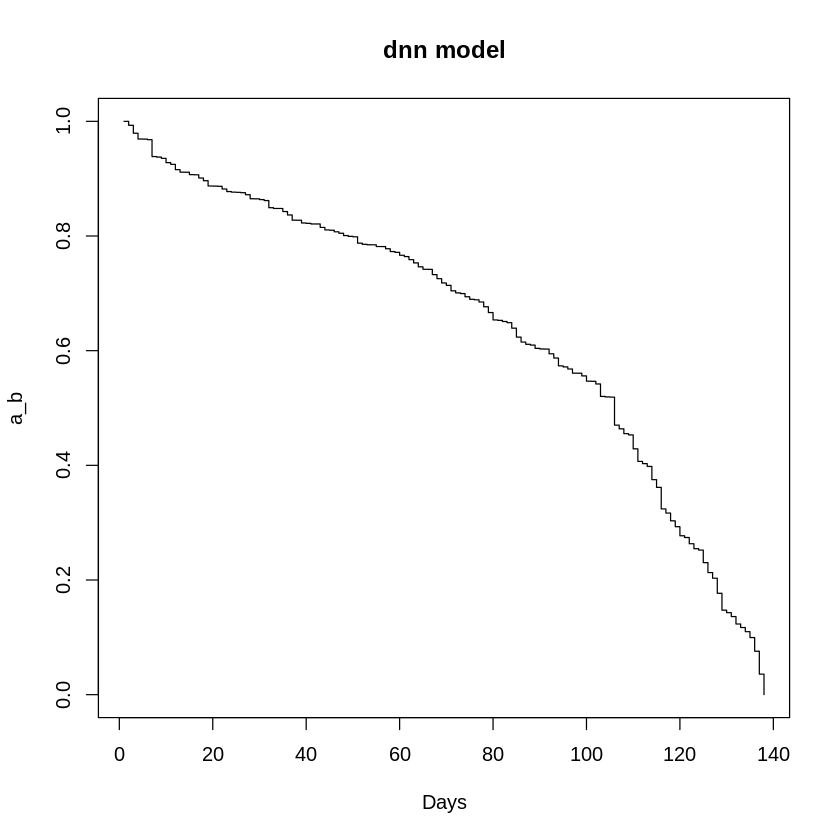

In [230]:
plot(a_b, type = "s", main = "dnn model", xlab="Days")

In [26]:
y_hat <- prediction.dnnsurv$crank

In [33]:
avg <- colMeans(m, na.rm = FALSE, dims = 1)

In [32]:
m <- matrix(y_hat)
cutpoints = qt,

In [145]:
N <- 100
x <- vector("list", N)

for(i in 1:100) {
  learner2 <- lrn("surv.dnnsurv", verbose = 1, validation_split = 0.3, early_stopping = TRUE, patience = 1,
                epochs = 10, cutpoints = qt, lr = 0.01, optimizer = 'adam')

  learner2$train(task_gbcs)

  prediction.dnnsurv2 = learner2$predict(test_gbcs) 
  r <- prediction.dnnsurv2$score()
  x[[i]] <- r

}

[[1]]
surv.harrell_c 
     0.6841364

In [130]:
learner.cox = lrn("surv.coxph") 

learner.cox$train(task_gbcs)
learner.cox$model 

prediction.cox = learner.cox$predict(test_gbcs) 
prediction.cox
prediction.cox$score() 

Call:
survival::coxph(formula = task$formula(), data = task$data(), 
    x = TRUE)

               coef exp(coef) se(coef)      z        p
age         0.15550   1.16825  0.14199  1.095  0.27345
estrg_recp  0.05275   1.05416  0.11275  0.468  0.63990
grade1     -1.28643   0.27626  0.48423 -2.657  0.00789
grade2     -0.48236   0.61732  0.19292 -2.500  0.01241
grade3           NA        NA  0.00000     NA       NA
hormone    -0.22560   0.79804  0.19050 -1.184  0.23631
menopause  -0.17756   0.83731  0.29747 -0.597  0.55058
nodes       0.29402   1.34182  0.05827  5.046 4.51e-07
prog_recp  -1.01213   0.36345  0.25477 -3.973 7.11e-05
size        0.22094   1.24725  0.07416  2.979  0.00289

Likelihood ratio test=96.67  on 9 df, p=< 2.2e-16
n= 548, number of events= 132 

<PredictionSurv> for 138 observations:
    row_ids time status      crank         lp                     distr
          1 2282  FALSE -0.5312450 -0.5312450 <VectorDistribution[138]>
          2 1456   TRUE -2.3158269 -2.3158269 <VectorDistribution[138]>
          3 2563  FALSE -0.4070265 -0.4070265 <VectorDistribution[138]>
---                                                                    
        136  841  FALSE -0.2694111 -0.2694111 <VectorDistribution[138]>
        137   16  FALSE  1.1737511  1.1737511 <VectorDistribution[138]>
        138  857  FALSE -0.4004860 -0.4004860 <VectorDistribution[138]>

surv.harrell_c 
     0.6897718

In [231]:
# retrieving cox mean
cox_mean <- prediction.cox$distr$mean()
# normalize it and putting in decreasing order
cox_n <- normalize(a)
a_b_cox <- sort(cox_n, decreasing = TRUE)

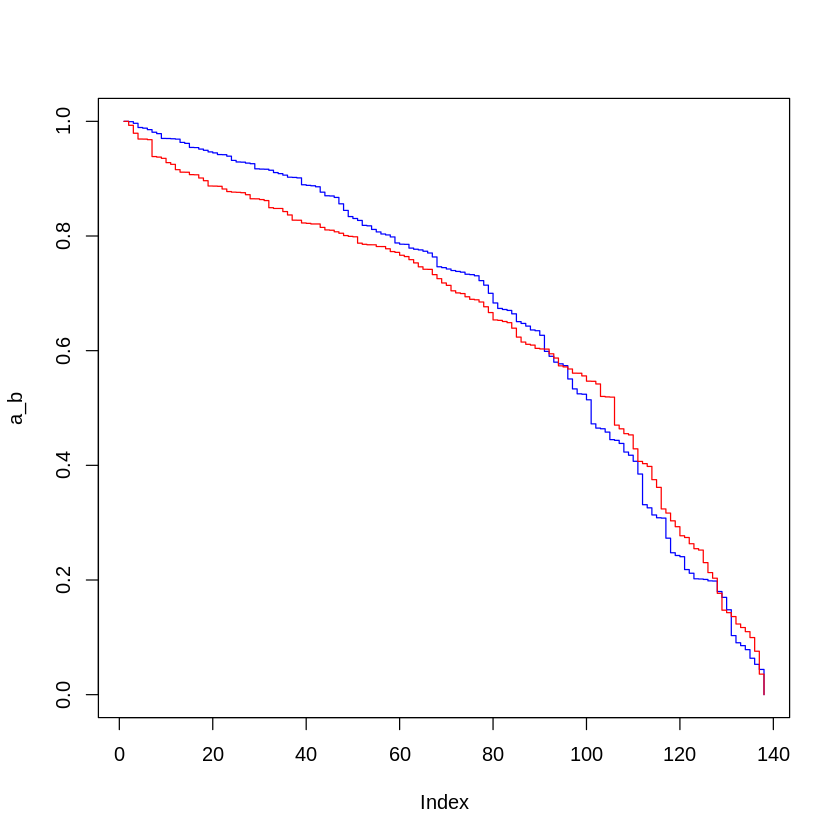

In [249]:
#plot dnn vs cox model
plot(a_b, type = "s", col="blue" )
points(a_b_cox, col="red", pch="")
lines(a_b_cox, col="red",lty=1, type = "s")

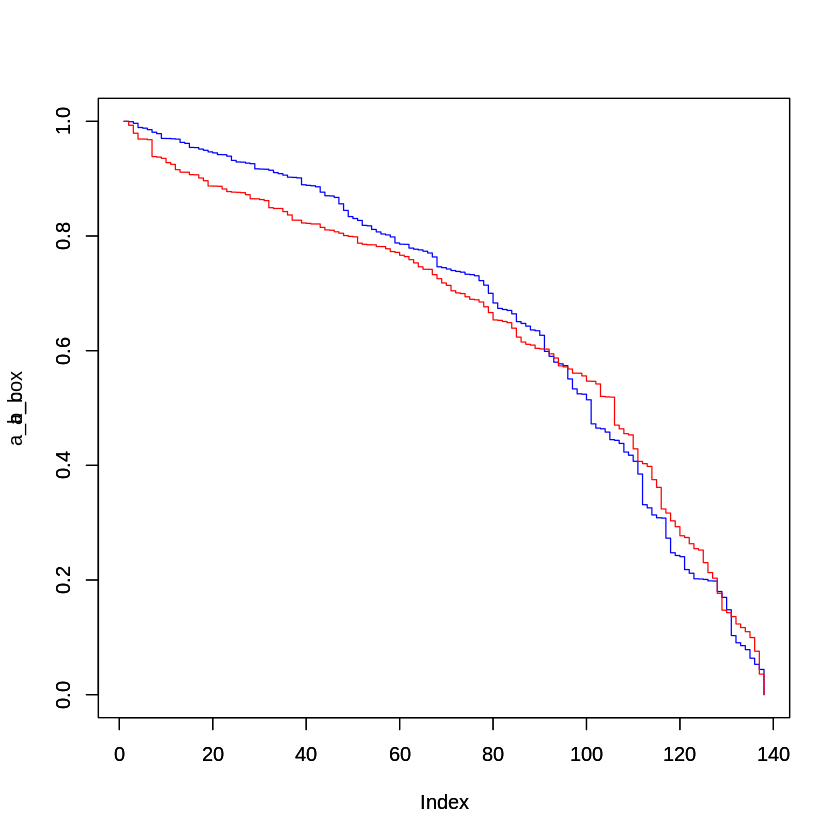

In [243]:
plot(a_b, type = "s", col="blue" )
par(new=TRUE)
plot(a_b_cox, type = "s", col="red" )